# PyTorch

PyTorch is a ubiquitous deep learning framework for Python. It was developed by Meta AI and is currently maintained by the Linux Foundation.

Just like the basic element being manipulated in NumPy is an nd.array, PyTorch deals mostly with tensors. A tensor is a multi-dimensional array of numbers, and tensor operations (e.g. multiplication) have strong GPU support in PyTorch, which makes it very fast.

# 1. Creating Tensors
Let's first learn to initialize a tensor.

In [1]:
import torch

# Creating a tensor of shape=1 with one element (scalar)
t1 = torch.zeros(1)
print(f'- scalar: \n{t1}, {t1.shape}\n')

# Creating a tensor of shape=1 with multiple elements (list)
t2 = torch.zeros(5)
print(f'- list: \n{t2}, {t2.shape}\n')

# Creating a tensor of shape=2 with one column (vector)
t3 = torch.zeros(5,1)
print(f'- vector: \n{t3}, {t3.shape}\n')

# Creating a tensor of shape=2 with multiple columns (matrix)
t4 = torch.zeros(4,2)
print(f'- matrix: \n{t4}, {t4.shape}\n')

# Creating a tensor of shape=3 (3-d tensor)
t5 = torch.zeros(4,2,4)
print(f'- 3-d tensor: \n{t5}, {t5.shape}\n')


- scalar: 
tensor([0.]), torch.Size([1])

- list: 
tensor([0., 0., 0., 0., 0.]), torch.Size([5])

- vector: 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]), torch.Size([5, 1])

- matrix: 
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]), torch.Size([4, 2])

- 3-d tensor: 
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]]), torch.Size([4, 2, 4])



We can obviously initialize a tensor with zeros, ones and random numbers as well.
The same arguments as above can be used to create tensors of different shapes and dimensions.

In [2]:
# Tensor of 1s
torch.ones(3,1)

tensor([[1.],
        [1.],
        [1.]])

In [3]:
# Tensor of unif. sampled values from 0 to 1
torch.rand(5,2,4)

tensor([[[0.6285, 0.0801, 0.8471, 0.9713],
         [0.5111, 0.4222, 0.1517, 0.8243]],

        [[0.8393, 0.9194, 0.5662, 0.4095],
         [0.9963, 0.9323, 0.0046, 0.2094]],

        [[0.7417, 0.4106, 0.8642, 0.9888],
         [0.2480, 0.2471, 0.6250, 0.9146]],

        [[0.6358, 0.7061, 0.9771, 0.1118],
         [0.1496, 0.8927, 0.8932, 0.1767]],

        [[0.6152, 0.6130, 0.4162, 0.6864],
         [0.6391, 0.3714, 0.0926, 0.0037]]])

Finally, we can convert a list into a tensor using torch.tensor

In [4]:
torch.tensor([1,2,9,-1])

tensor([ 1,  2,  9, -1])

### Changing Tensors Data Types ###

Note that all tensors so far have float values. We can change this using tensor.type

In [5]:
t = torch.rand(1,3)
print(f'{t} -> {t.dtype}')

tensor([[0.9203, 0.3194, 0.8026]]) -> torch.float32


In [6]:
t_int = t.type(torch.double)
print(f'{t} -> {t_int.dtype}')

tensor([[0.9203, 0.3194, 0.8026]]) -> torch.float64


In [7]:
t_int = t.type(torch.int)
print(f'{t} -> {t_int.dtype}')

tensor([[0.9203, 0.3194, 0.8026]]) -> torch.int32


In [8]:
t_int = t.type(torch.long)
print(f'{t} -> {t_int.dtype}')

tensor([[0.9203, 0.3194, 0.8026]]) -> torch.int64


# 2. Basic Operations


In [9]:
t1 = torch.rand(1,3)
print(f't1: {t1}')

t1: tensor([[0.1750, 0.9092, 0.7823]])


In [10]:
t2 = torch.rand(1,3)
print(f't2: {t2}')

t2: tensor([[0.7202, 0.7435, 0.9428]])


In [11]:
print(f'addition: t1 + t2 = {t1 + t2}\n')

print(f'subtraction: t1 - t2 = {t1 - t2}\n')

print(f'element-wise product: t1 .* t2 = {t1 * t2}\n')

print(f'element-wise division: t1 ./ t2 = {t1 / t2}\n')

addition: t1 + t2 = tensor([[0.8952, 1.6527, 1.7251]])

subtraction: t1 - t2 = tensor([[-0.5451,  0.1657, -0.1605]])

element-wise product: t1 .* t2 = tensor([[0.1261, 0.6760, 0.7376]])

element-wise division: t1 ./ t2 = tensor([[0.2431, 1.2229, 0.8298]])



The dot product is only defined for 1-D tensors. Therefore, we need to flatten t1 and t2

In [12]:
t1 = t1.squeeze()
t2 = t2.squeeze()

print(f'dot product: <t1,t2> = {torch.dot(t1, t2)}\n')

dot product: <t1,t2> = 1.5395761728286743



Transpose can be easily done with .T, but the tensors must be 2-D

In [13]:
# List
t = torch.rand(3)
print(t)
print(t.T)

tensor([0.2896, 0.5563, 0.4948])
tensor([0.2896, 0.5563, 0.4948])


/var/folders/45/871v_dk90997hj5g88_1z7tr0000gn/T/ipykernel_2814/2248846859.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3687.)
  print(t.T)


In [14]:
# Vector
t = torch.rand(1,4)
print(t)
print(t.T)

tensor([[0.8409, 0.9538, 0.5117, 0.1530]])
tensor([[0.8409],
        [0.9538],
        [0.5117],
        [0.1530]])


In [15]:
# Matrix
t = torch.rand(2,4)
print(t)
print(t.T)

tensor([[0.5221, 0.5084, 0.5487, 0.9452],
        [0.6070, 0.6775, 0.8995, 0.0872]])
tensor([[0.5221, 0.6070],
        [0.5084, 0.6775],
        [0.5487, 0.8995],
        [0.9452, 0.0872]])


In [16]:
# Tensor
t = torch.rand(2,4,3)
print(t)
print(t.T)

tensor([[[0.7430, 0.6094, 0.9116],
         [0.0425, 0.5221, 0.9946],
         [0.9525, 0.0013, 0.9133],
         [0.9508, 0.2101, 0.7193]],

        [[0.6168, 0.5844, 0.9384],
         [0.3413, 0.4368, 0.7137],
         [0.5756, 0.6314, 0.5133],
         [0.6859, 0.4566, 0.2353]]])
tensor([[[0.7430, 0.6168],
         [0.0425, 0.3413],
         [0.9525, 0.5756],
         [0.9508, 0.6859]],

        [[0.6094, 0.5844],
         [0.5221, 0.4368],
         [0.0013, 0.6314],
         [0.2101, 0.4566]],

        [[0.9116, 0.9384],
         [0.9946, 0.7137],
         [0.9133, 0.5133],
         [0.7193, 0.2353]]])


If the dimensions match, we can also use @ or torch.matmul for matrix multiplication.

In [17]:
t1 = torch.rand(4,3)
t2 = torch.rand(3,2)

t1 @ t2

tensor([[0.5539, 0.1832],
        [1.2856, 0.4638],
        [0.8821, 0.3677],
        [2.4266, 1.2929]])

# 3. Broadcasting

Like in NumPy, if the dimensions of some operations do not match (e.g. addition of scalar and vector), PyTorch tries to stretch one of the tensors to make everything work.

In [18]:
t1 = torch.ones(1)
t2 = torch.rand(2,5)

print(f't1 = {t1}\n')
print(f't2 = {t2}\n')
print(f't1 + t2 = {t2 + t1}')

t1 = tensor([1.])

t2 = tensor([[0.9257, 0.0668, 0.1409, 0.7467, 0.5037],
        [0.1641, 0.4604, 0.1349, 0.3702, 0.4914]])

t1 + t2 = tensor([[1.9257, 1.0668, 1.1409, 1.7467, 1.5037],
        [1.1641, 1.4604, 1.1349, 1.3702, 1.4914]])


In [19]:
t1 = torch.ones(1,3)
t2 = torch.rand(3,1)

print(f't1 = {t1}\n') # becomes ones(3,3)
print(f't2 = {t2}\n') # becomes 3 columns of t2 stacked
print(f't1 + t2 = {t2 + t1}')

t1 = tensor([[1., 1., 1.]])

t2 = tensor([[0.9792],
        [0.3334],
        [0.1550]])

t1 + t2 = tensor([[1.9792, 1.9792, 1.9792],
        [1.3334, 1.3334, 1.3334],
        [1.1550, 1.1550, 1.1550]])


# 3. Device

If GPU(s) are available, then we can use torch.device to create a device object and then either and then either move 

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [21]:
# Creating x on CPU, then sending to device
x = torch.rand(3,2)
x.to(device)

tensor([[0.9599, 0.8938],
        [0.6229, 0.4873],
        [0.8177, 0.3606]])

In [22]:
# Creating x on device
x = torch.rand(3,2, device=device)

# 3. Gradients 

In PyTorch, tensors can be built in a way that gradients of future operations are stored. This enables the famous backpropagation algorithm to tweak weights based on some gradient descent variation of the gradient of a loss function w.r.t each weight.

In [23]:
# By default, requires_grad=False
t1 = torch.rand(1, requires_grad=True)
print(t1)
print(t1.grad)

tensor([0.1483], requires_grad=True)
None


In [24]:
# At first, t1.grad is None. For it to be computed, we must perform some operation with it....
y = t1 * 2
print(y)

#... and run y.backward() to explicitly calculate the gradients...
y.backward()

#... then finally find the gradient
print(t1.grad)

tensor([0.2966], grad_fn=<MulBackward0>)
tensor([2.])


Note that dy/dt1 = 2, so the gradient is correct, and that y must be a scalar for it to work.

# 4. Simple Training Loop: Linear Regression

Now, let's run a simple linear regression using gradient descent.

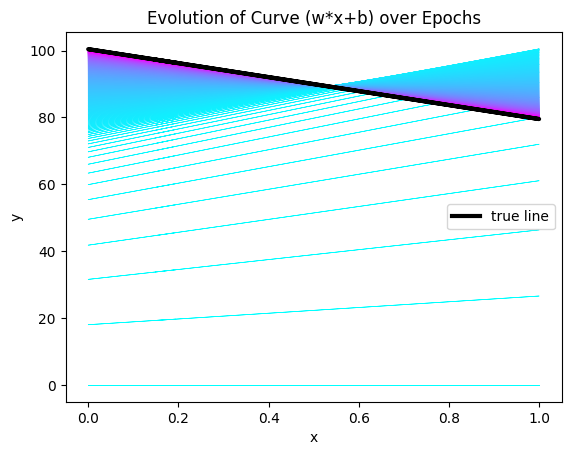

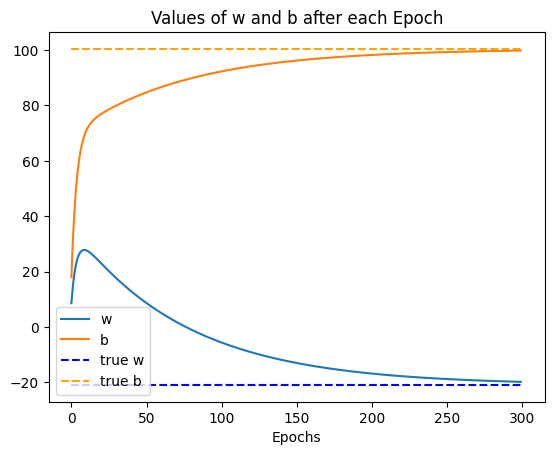

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generating Data
N = 1000
x = torch.rand(N,1)             # input
w_true = torch.tensor([[-20.91]]) # true weight
b_true = torch.tensor([[100.42]]) # true bias
y = x@w_true + b_true           # output with true weight and bias

# Weights
w = torch.zeros(1,1, requires_grad=True)
b = torch.zeros(1,1, requires_grad=True)

# Hyperparameter
lr = 1e-1
n_epochs = 300

# Plotting colors
colors = plt.cm.cool(np.linspace(0,1,n_epochs))

# Empty lists to store values for w and b
ws = []
bs = []

# Performing gradient descent n_epochs-times
for i in range(n_epochs):

    # find y_pred with current w and b
    y_pred = x@w + b

    # calculate MSE loss
    loss = ((y - y_pred)**2).mean()

    # backpropagate loss
    loss.backward()

    # update weights (without saving operation in grad)
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad

    # zeroing the gradients (otherwise, they accumulate)
    w.grad.zero_()
    b.grad.zero_()

    # Save values and plot line
    ws.append(w.item())
    bs.append(b.item())
    plt.plot(x,y_pred.detach(), color=colors[i], linewidth=0.5)

plt.plot(x,y, c='black', label='true line', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Evolution of Curve (w*x+b) over Epochs')
plt.legend()
plt.show()

# Plotting ws and bs over epochs
plt.plot(ws, label='w')
plt.plot(bs, label='b')
plt.hlines(w_true.item(), 0, n_epochs, label='true w', color='blue', linestyle='dashed')
plt.hlines(b_true.item(), 0, n_epochs, label='true b', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.title('Values of w and b after each Epoch')
plt.legend()
plt.show()

# 5. A More Realistic Training Loop

We'll now use the famous MNIST dataset as a toy example to showcase how PyTorch's training loop works.

First, we'll import the mnist training and test data.

In [26]:
from datasets import load_dataset

train = load_dataset("ylecun/mnist", split="train")
print(f'train size: {len(train)}')

test = load_dataset("ylecun/mnist", split="test")
print(f'train size: {len(test)}')

/Users/user1/Desktop/MSc. Machine Learning, Systems and Control/study/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


train size: 60000
train size: 10000


We will now build a PyTorch Dataset with this data. The Dataset is used to transform the PIL images into a PyTorch tensor.

In [28]:
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
from tqdm import tqdm
from torch import nn

# Custom PyTorch Dataset wrapper for the Hugging Face dataset
class MNISTDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.transform = ToTensor()

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Convert dataset samples to PyTorch tensors
        data = self.dataset[idx]
        image = self.transform(data['image']).squeeze(1)  # Normalize to [0, 1] and add channel dimension
        label = torch.tensor(data['label'], dtype=torch.long)
        return image, label

We now create a train and test dataset

In [29]:
train_data = MNISTDataset(train)
test_data = MNISTDataset(test)

We now build a DataLoader with these datasets. The DataLoader will create shuffled batches of (images, labels), which will be loaded until the entire dataset has been seen (i.e. an epoch as has passed).

In [30]:
train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=32, shuffle=True)

We now create the CNN with a sequence of three convolution blocks (Conv + Pool + ReLU), followed by a simple flatenning and 2 lienar layers.

In [41]:
class CNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            
            nn.Conv2d(1, 8, 3),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            
            nn.Conv2d(8, 16, 3),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            
            nn.Conv2d(16, 32, 3),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            
            nn.Flatten(1),
            nn.Linear(32, 10),

        )

    def forward(self, image):
        return self.model(image)

model = CNet()
print(f'# params: {np.sum([p.numel() for p in model.parameters()])}')

# params: 6218


We now initialize PyTorch's implementation of the Cross Entropy loss and the Adam optimizer

In [42]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

Finally, we can train the model using a simple loop.

In [43]:
n_epochs = 10

for i in range(n_epochs):

    # Training over the entire training dataset
    model.train()
    for images, labels in tqdm(train_dl):
        
        labels_pred = model(images)
        
        loss = loss_fn(labels_pred, labels)

        optim.zero_grad()
        loss.backward()
        optim.step()

    # Testing over the entire test dataset
    model.eval()
    loss_tests = []
    for images, labels in tqdm(test_dl):
        labels_pred = model(images)
        loss_tests.append(loss_fn(labels_pred, labels).item())
        
    print(f'{i+1}/{n_epochs} -> training loss: {loss.item()} | test loss: {np.mean(loss_tests)}')



00%|████████████████████████████████████████| 313/313 [00:00<00:00, 314.61it/s]

1/10 -> training loss: 0.587311863899231 | test loss: 0.4771125042400421




00%|████████████████████████████████████████| 313/313 [00:00<00:00, 313.33it/s]

2/10 -> training loss: 0.36713913083076477 | test loss: 0.30417467161013295




00%|████████████████████████████████████████| 313/313 [00:00<00:00, 314.56it/s]

3/10 -> training loss: 0.5261218547821045 | test loss: 0.2505687914860134




00%|████████████████████████████████████████| 313/313 [00:00<00:00, 313.60it/s]

4/10 -> training loss: 0.31330713629722595 | test loss: 0.21423409002038618




00%|████████████████████████████████████████| 313/313 [00:00<00:00, 316.12it/s]

5/10 -> training loss: 0.10870707780122757 | test loss: 0.19150976111558965




00%|████████████████████████████████████████| 313/313 [00:00<00:00, 313.89it/s]

6/10 -> training loss: 0.05444721877574921 | test loss: 0.17351951267415533




00%|████████████████████████████████████████| 313/313 [00:01<00:00, 306.58it/s]

7/10 -> training loss: 0.17417490482330322 | test loss: 0.15993865279736705




00%|████████████████████████████████████████| 313/313 [00:00<00:00, 313.46it/s]

8/10 -> training loss: 0.13710765540599823 | test loss: 0.15510257193372368




00%|████████████████████████████████████████| 313/313 [00:00<00:00, 313.77it/s]

9/10 -> training loss: 0.04521583393216133 | test loss: 0.14169804063051367



100%|████████████████████████████████████████| 313/313 [00:00<00:00, 313.32it/s]

10/10 -> training loss: 0.01961393840610981 | test loss: 0.13491623969480823


Let's now check some test pictures and their predicted labels.

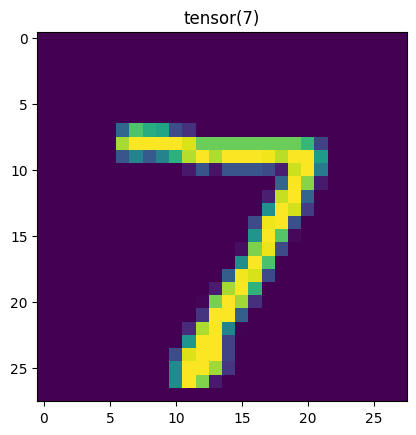

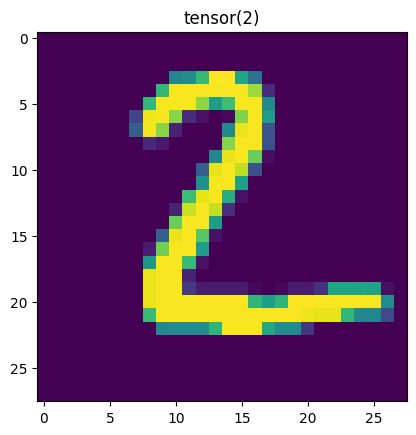

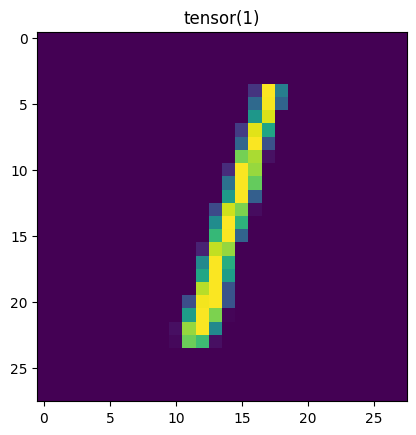

In [44]:
for i in range(3):
    image = test_data[i][0]
    label_pred = model(image.unsqueeze(0))
    plt.imshow(image[0])
    plt.title(label_pred.argmax())
    plt.show()